In [36]:
import numpy as np
import pandas as pd
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from nptdms import TdmsFile
from itertools import groupby
from operator import itemgetter

In [37]:
# 1. EMG 데이터 로드 및 전처리
# emg_data = pd.read_csv('../../data/250602_leejw.csv', skiprows=6)
# tdms = TdmsFile.read('../../data/250602_leejw.tdms')
# split_times = [400, 700]
# shift_sec = 9
# Fs_emg = 2148.1481

# emg_data = pd.read_csv('../../data/250602_jeongsh.csv', skiprows=6)
# tdms = TdmsFile.read('../../data/250602_jeongsh.tdms')
# split_times = [350, 790]
# shift_sec = 0
# Fs_emg = 2148.1481

# emg_data = pd.read_csv('../../data/250605_AJW.csv', skiprows=6)
# tdms = TdmsFile.read('../../data/250605_AJW.tdms')
# split_times = [350, 790]
# shift_sec = 0
# Fs_emg = 1259.2593

# emg_data = pd.read_csv('../../data/250605_KDY.csv', skiprows=6)
# tdms = TdmsFile.read('../../data/250605_KDY.tdms')
# split_times = [500, 900]
# shift_sec = 0
# Fs_emg = 1259.2593


# emg_data = pd.read_csv('../../data/250609_JSH.csv', skiprows=6)
# tdms = TdmsFile.read('../../data/250609_JSH.tdms')
# split_times = [610, 1130]
# shift_sec = 0
# Fs_emg = 1259.2593

# emg_data = pd.read_csv('../../data/250605_KMJ.csv', skiprows=6)
# tdms = TdmsFile.read('../../data/250605_KMJ.tdms')
# split_times = [250, 600]
# shift_sec = 3
# Fs_emg = 1259.2593
#--------------------------------------------------------------

# emg_data = pd.read_csv('../../data/250609_LJW.csv', skiprows=6)
# tdms = TdmsFile.read('../../data/250609_LJW.tdms')
# split_times = [550, 860]
# shift_sec = 0
# Fs_emg = 1259.2593

# emg_data = pd.read_csv('../../data/250609_JSH.csv', skiprows=6)
# tdms = TdmsFile.read('../../data/250609_JSH.tdms')
# split_times = [550, 930]
# shift_sec = 0
# Fs_emg = 1259.2593

emg_data = pd.read_csv('../../data/250609_KDH_easy.csv', skiprows=6)
tdms = TdmsFile.read('../../data/250609_KDH_easy.tdms')
split_times = [1000, 1350]
shift_sec = 0
Fs_emg = 1259.2593


# emg_data = pd.read_csv('../../data/250611_KMJ.csv', skiprows=6)
# tdms = TdmsFile.read('../../data/250611_KMJ.tdms')
# split_times = [600, 1000]
# shift_sec = 0
# Fs_emg = 1259.2593



# emg_data = pd.read_csv('../../data/250611_AJW.csv', skiprows=6)
# tdms = TdmsFile.read('../../data/250611_AJW.tdms')
# split_times = [900, 1260]
# shift_sec = 0
# Fs_emg = 1259.2593

# emg_data = pd.read_csv('../../data/250611_PGE.csv', skiprows=6)
# tdms = TdmsFile.read('../../data/250611_PGE.tdms')
# split_times = [410, 790]
# shift_sec = 0
# Fs_emg = 2148.1481

# emg_data = pd.read_csv('../../data/250609_HNG_merged.csv')
# tdms = TdmsFile.read('../../data/250609_HNG_merged.tdms')
# split_times = [500, 1100]
# shift_sec = 0
# Fs_emg = 1259.2593


# emg_data = pd.read_csv('../../data/250611_AIG.csv', skiprows=6)
# tdms = TdmsFile.read('../../data/250612_AIG.tdms')
# split_times = [410, 810]
# shift_sec = 0
# Fs_emg = 1259.2593



signal_raw = pd.to_numeric(emg_data.iloc[:, 0], errors='coerce').dropna().values

t_emg = np.arange(len(signal_raw)) / Fs_emg

# 2. Load TDMS and extract Trajectory
group = 'emg_Datas' if 'emg_Datas' in tdms.groups() else list(tdms.groups())[0].name
traj = tdms[group]['Trajectory'][:]
Fs_tdms = 50  # TDMS sampling rate (Hz)
t_tdms = np.arange(len(traj)) / Fs_tdms

C:\Users\awear\AppData\Local\Temp\ipykernel_53796\3212834766.py:52: DtypeWarning: Columns (1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  emg_data = pd.read_csv('../../data/250609_KDH_easy.csv', skiprows=6)


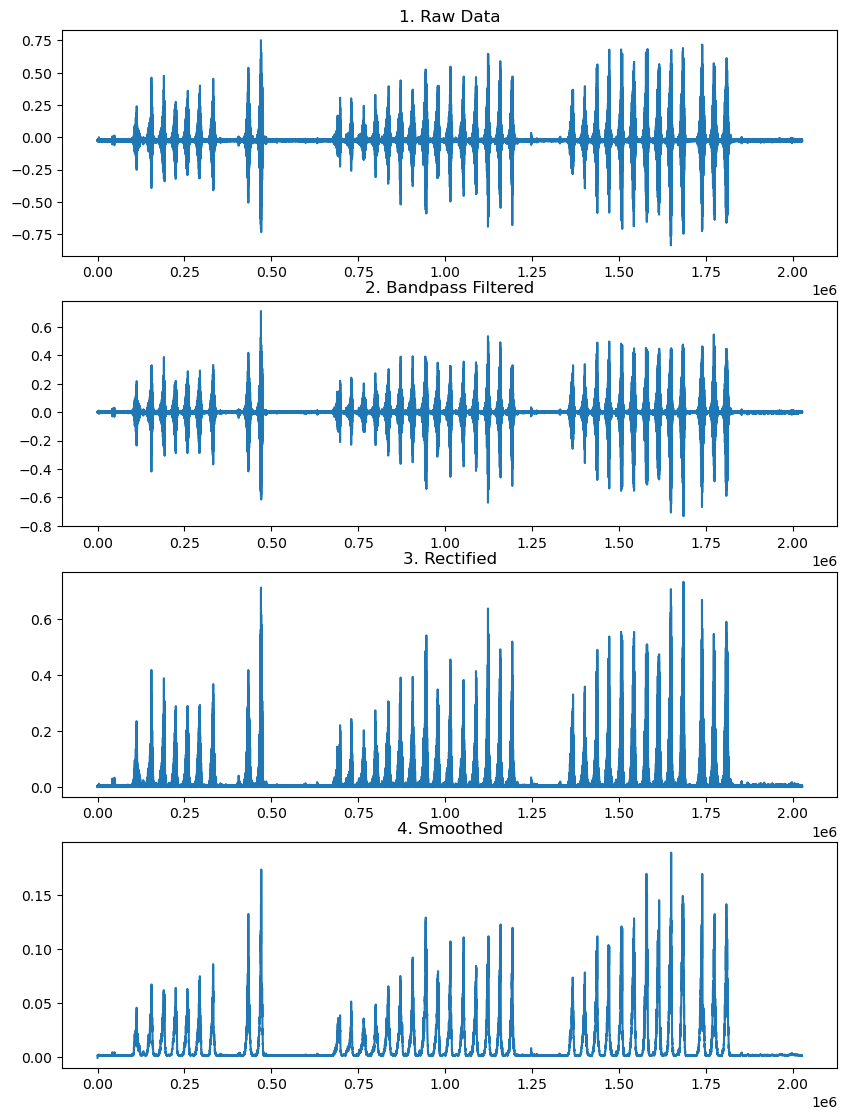

In [38]:
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# 1. CSV 파일 불러오기 (숫자 데이터만)
# data = pd.read_csv('Trial_1.csv', skiprows=6)  # 'EMG 1 (mV)' 다음 줄부터 데이터

# 2. 첫 컬럼만 추출 (예: EMG 1만 존재한다고 가정)
signal_raw = pd.to_numeric(emg_data.iloc[:, 0], errors='coerce').dropna().values

# 3. 샘플링 주파수
# Fs = 2148.1481
Fs = 1259.2593

# 4. 필터 함수 정의
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low, high = lowcut / nyq, highcut / nyq
    return butter(order, [low, high], btype='band')

def butter_lowpass(cutoff, fs, order=4):
    nyq = 0.5 * fs
    norm_cutoff = min(cutoff / nyq, 0.99)
    return butter(order, norm_cutoff, btype='low')

# 5. Bandpass Filter (40–450Hz)
b_bpf, a_bpf = butter_bandpass(40, 450, Fs)
signal_filtered = filtfilt(b_bpf, a_bpf, signal_raw)

# 6. Rectification
signal_rectified = np.abs(signal_filtered)

# 7. Low-pass Filter (3Hz)
b_lpf, a_lpf = butter_lowpass(3, Fs)
signal_smoothed = filtfilt(b_lpf, a_lpf, signal_rectified)

# 8. Plotting
plt.figure(figsize=(10, 17))

plt.subplot(5, 1, 1)
plt.plot(signal_raw)
plt.title("1. Raw Data")

plt.subplot(5, 1, 2)
plt.plot(signal_filtered)
plt.title("2. Bandpass Filtered")

plt.subplot(5, 1, 3)
plt.plot(signal_rectified)
plt.title("3. Rectified")

plt.subplot(5, 1, 4)
plt.plot(signal_smoothed)
plt.title("4. Smoothed")

plt.show()


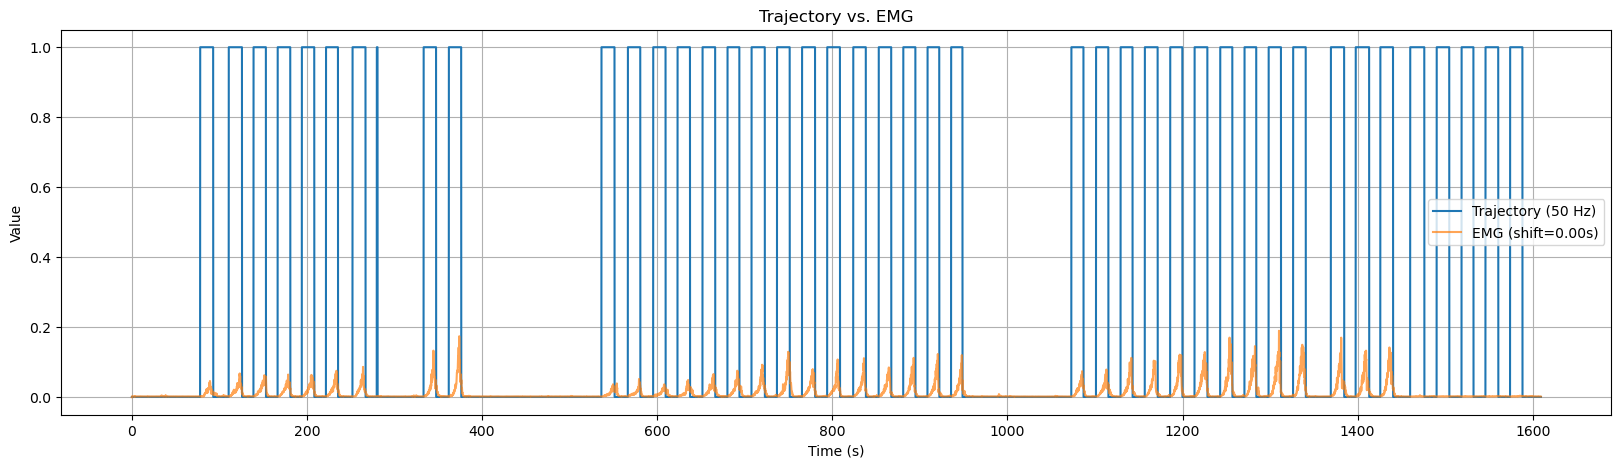

In [39]:
traj = tdms[group]['Trajectory'][:]    # Trajectory 로드 (값은 0/1)
t_traj = np.arange(len(traj)) / 50      # Trajectory의 시간축 (50Hz 가정)

# signal_smoothed: EMG 원본 (≈2148Hz)
t_emg = np.arange(len(signal_smoothed)) / Fs_emg  # EMG의 시간축 (≈1259Hz)

#    예: EMG가 Trajectory보다 1.2초 늦게 시작된 경우, EMG 시간축에서 1.2초를 빼준다.
#    (반대로 EMG가 앞서 있다면 음수가 아닌 양수로 넣으면 됨)


# 4) 플롯
plt.figure(figsize=(20, 5))

# 4-1. Trajectory (50Hz)
plt.plot(t_traj, traj, color='C0', label='Trajectory (50 Hz)')

plt.plot(t_emg + shift_sec, signal_smoothed, color='C1', alpha=0.7, label=f'EMG (shift={shift_sec:.2f}s)')

plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.title('Trajectory vs. EMG')
plt.legend()
plt.grid(True)
plt.show()


In [40]:
t_traj = np.arange(len(traj)) / 50.0               # Trajectory 시간축 (50 Hz)
t_emg = np.arange(len(signal_smoothed)) / Fs_emg  # EMG 시간축 (≈1259 Hz)
t_emg_shifted = t_emg + shift_sec                  # EMG를 shift만큼 이동

# (2) EMG를 50 Hz로 다운샘플링 (선형 보간)
emg_down_50Hz = np.interp(
    t_traj,
    t_emg_shifted,
    signal_smoothed,
    left=0.0,    # EMG 시작 전 구간은 0으로 채움
    right=0.0    # EMG 종료 후 구간도 0으로 채움
)

# (3) 결과 확인 (옵션)
print("t_traj.shape        =", t_traj.shape)
print("traj.shape          =", traj.shape)
print("emg_down_50Hz.shape =", emg_down_50Hz.shape)

# 이제 emg_down_50Hz, traj, t_traj 변수가 메모리에 저장되어 있습니다.

t_traj.shape        = (80468,)
traj.shape          = (80468,)
emg_down_50Hz.shape = (80468,)


group1 구간: 0.00s 부터 1000.00s 까지
샘플 개수 = 50001


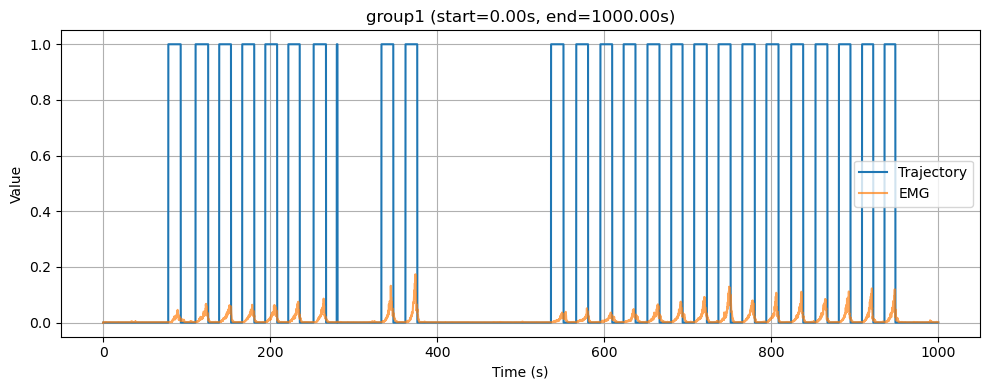

In [41]:

group = 'group1'

# (1) group 문자열에서 인덱스 추출 (예: 'group1' → 0번째 구간)
group_idx = int(group.replace('group', '')) - 1

# (2) 기준 time, traj, emg_down_50Hz 변수가 이미 정의되어 있다고 가정
#     여기서는 t_traj를 time으로 사용
time = t_traj  # 50 Hz 시간축

# (3) start_time, end_time 계산
if group_idx == 0:
    start_time = 0.0
    end_time = split_times[0]
elif group_idx < len(split_times):
    start_time = split_times[group_idx - 1]
    end_time = split_times[group_idx]
else:
    start_time = split_times[-1]
    end_time = time[-1]

# (4) 시간축에서 start_time, end_time에 가장 가까운 인덱스 찾기
idx_start = np.searchsorted(time, start_time, side='left')
idx_end   = np.searchsorted(time, end_time,   side='right')

# (5) 해당 구간만 슬라이싱
time_seg = time[idx_start:idx_end]
traj_seg = traj[idx_start:idx_end]
emg_seg  = emg_down_50Hz[idx_start:idx_end]

# (6) 선택된 구간 정보 출력 (옵션)
print(f"{group} 구간: {start_time:.2f}s 부터 {end_time:.2f}s 까지")
print(f"샘플 개수 = {len(time_seg)}")


plt.figure(figsize=(10, 4))
plt.plot(time_seg, traj_seg, label='Trajectory', color='C0')
plt.plot(time_seg, emg_seg,  label='EMG',        color='C1', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.title(f'{group} (start={start_time:.2f}s, end={end_time:.2f}s)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\awear\AppData\Local\Temp\ipykernel_53796\2611434714.py:67: RuntimeWarning: Mean of empty slice
  mean_c = np.nanmean(padded, axis=0)
c:\Users\awear\miniconda3\envs\cdrr\lib\site-packages\numpy\lib\_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


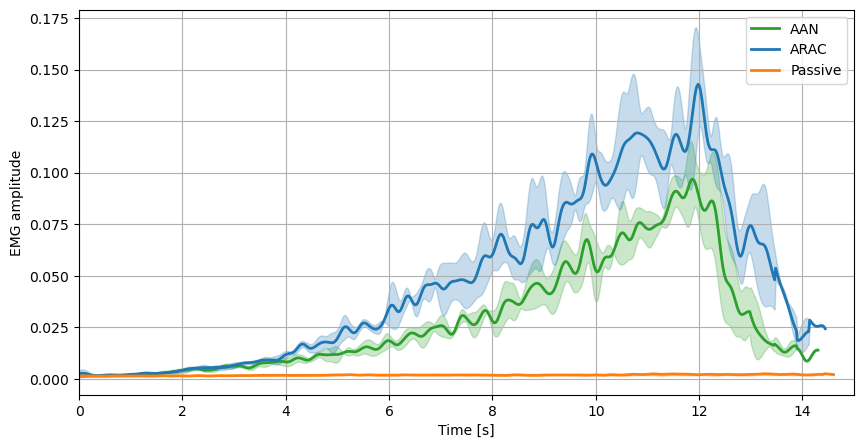

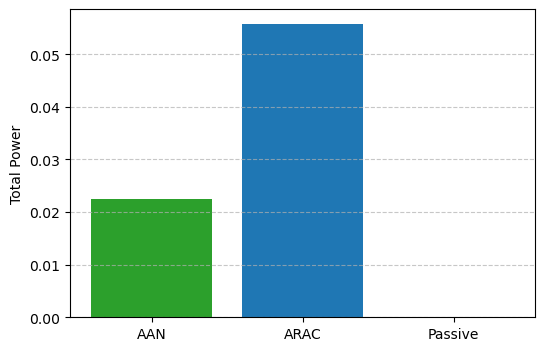

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# SETTINGS
# ------------------------------------------------------------------
last_n          = 4               # 마지막 N개 사이클 사용
fs_traj         = 50              # Hz
fixed_len_sec   = 15              # 각 사이클을 15초로 맞춤
fixed_len       = int(fixed_len_sec * fs_traj)

group_colors = ['C2', 'C0', 'C1']
group_labels = ['AAN', 'ARAC','Passive']
# split_times  = [400, 700]         # 그룹 구간 설정
# ------------------------------------------------------------------

def get_last_n_cycles(emg_seg, traj_seg, last_n):
    """Trajectory에서 사이클 추출 후 마지막 N개 EMG 사이클 반환"""
    rising  = np.where((traj_seg[:-1] == 0) & (traj_seg[1:] == 1))[0] + 1
    falling = np.where((traj_seg[:-1] == 1) & (traj_seg[1:] == 0))[0] + 1
    if rising.size == 0 or falling.size == 0:
        return []

    if falling[0] < rising[0]:
        falling = falling[1:]
    rising = rising[:len(falling)]

    cycles = [emg_seg[s:e] for s, e in zip(rising, falling)]
    if len(cycles) < last_n:
        return []
    return cycles[-last_n:]

# ------------------------------------------------------------------
# (1) Plot Mean ± SD
# ------------------------------------------------------------------
plt.figure(figsize=(10, 5))
group_powers = []

for gidx in range(len(split_times) + 1):
    # 구간 범위 정의
    if gidx == 0:
        start_t, end_t = 0.0, split_times[0]
    elif gidx < len(split_times):
        start_t, end_t = split_times[gidx - 1], split_times[gidx]
    else:
        start_t, end_t = split_times[-1], t_traj[-1]

    # 구간 추출
    seg_mask  = (t_traj >= start_t) & (t_traj < end_t)
    traj_seg  = traj[seg_mask]
    emg_seg   = emg_down_50Hz[seg_mask]

    # 사이클 추출
    cycles = get_last_n_cycles(emg_seg, traj_seg, last_n)
    if len(cycles) == 0:
        print(f'{group_labels[gidx]}: not enough cycles')
        group_powers.append(np.nan)
        continue

    # 고정 길이 패딩
    padded = np.full((last_n, fixed_len), np.nan)
    for i, c in enumerate(cycles):
        trimmed = c[:fixed_len]
        padded[i, :len(trimmed)] = trimmed

    # 평균 ± SD
    mean_c = np.nanmean(padded, axis=0)
    std_c  = np.nanstd(padded, axis=0)
    t_in   = np.arange(fixed_len) / fs_traj

    # Plot
    plt.plot(t_in, mean_c, color=group_colors[gidx],
             linewidth=2, label=group_labels[gidx])
    plt.fill_between(t_in, mean_c - std_c, mean_c + std_c,
                     color=group_colors[gidx], alpha=0.25)

    # Total power 계산
    dt = 1 / fs_traj
    powers = [np.sum(c**2) * dt for c in cycles]
    group_powers.append(np.mean(powers))

plt.xlabel('Time [s]')
plt.ylabel('EMG amplitude')
# plt.title(f'Mean ± SD of last {last_n} cycles for each group')
plt.grid(True)
plt.legend()
plt.xlim(0, fixed_len_sec)
plt.show()

# ------------------------------------------------------------------
# (2) Bar Plot of Total Power
# ------------------------------------------------------------------
plt.figure(figsize=(6, 4))
plt.bar(group_labels, group_powers, color=group_colors)
plt.ylabel('Total Power')
# plt.title('EMG Total Power by Group')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [43]:
print(group_powers)

[np.float64(0.022468912927915502), np.float64(0.0557723750124688), np.float64(4.854089555987785e-05)]


In [44]:
# 원시 데이터
# participant1 = [0.0046405, 0.0175836, 0.0254939]  # LJW
# participant2 = [0.0006574, 0.0179923, 0.0302460]  # JSH
# participant3 = [0.00022623, 0.00248322, 0.00341677]  # AJW (2중 리스트 제거)
# participant4 = [0.00086965, 0.00333674, 0.01424477]  # KDY (2중 리스트 제거)
# participant5 = [0.00549489, 0.02525252, 0.04734170]  # KMJ

# [np.float64(0.01566232191896718), np.float64(0.043164304562662285), np.float64(9.617439800402768e-05)]
# [np.float64(0.016462179021517673), np.float64(0.0226162091808534), np.float64(0.00027636916716296576)]
# [np.float64(0.022468912927915502), np.float64(0.0557723750124688), np.float64(4.854089555987785e-05)]
# [np.float64(0.04106333758357777), np.float64(0.04464540231822996), np.float64(0.01033633330224644)]
# [np.float64(0.005031651869630344), np.float64(0.006335565083385888), np.float64(8.632001826431004e-05)]
# [np.float64(0.001990081656240324), np.float64(0.002325492302681139), np.float64(0.00024732700164244105)]
# [np.float64(0.00393775684971357), np.float64(0.006326075263996409), np.float64(0.00019177317831647601)]
# [np.float64(0.025891210219886687), np.float64(0.048203837196008494), np.float64(0.003232644686684996)]


# # 데이터 묶기
# data = np.vstack([participant1, participant2, participant3, participant4, participant5])  # shape (5, 3)


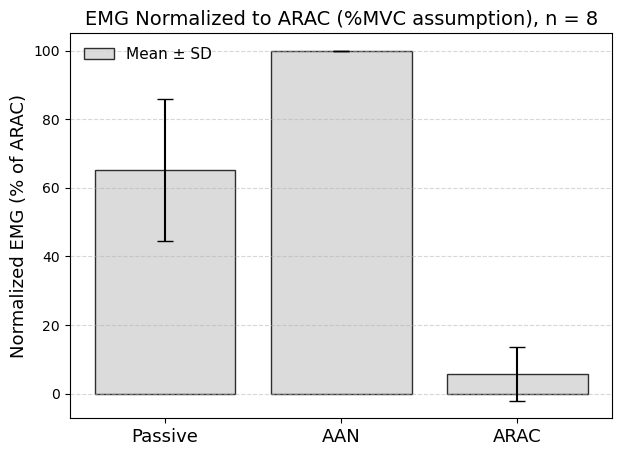

In [45]:
import numpy as np
import matplotlib.pyplot as plt




import numpy as np

# 각 참가자 데이터
participant1 = [0.01566232191896718, 0.043164304562662285, 9.617439800402768e-05]
participant2 = [0.016462179021517673, 0.0226162091808534, 0.00027636916716296576]
participant3 = [0.022468912927915502, 0.0557723750124688, 4.854089555987785e-05]
participant4 = [0.04106333758357777, 0.04464540231822996, 0.01033633330224644]
participant5 = [0.005031651869630344, 0.006335565083385888, 8.632001826431004e-05]
participant6 = [0.001990081656240324, 0.002325492302681139, 0.00024732700164244105]
participant7 = [0.00393775684971357, 0.006326075263996409, 0.00019177317831647601]
participant8 = [0.025891210219886687, 0.048203837196008494, 0.003232644686684996]

# 배열로 묶기
data = np.vstack([
    participant1,
    participant2,
    participant3,
    participant4,
    participant5,
    participant6,
    participant7,
    participant8
])  # shape: (8, 3)

# 결과 확인
# print(data)

n_participants = data.shape[0]
group_labels = ['Passive', 'AAN', 'ARAC']
x = np.arange(len(group_labels))

# (1) 정규화: 각 행의 마지막 값(ARAC)을 기준으로 %MVC 계산
data_norm = (data.T / data[:, -2]).T * 100  # ARAC 기준 정규화

# (2) 평균과 표준편차
mean_vals = data_norm.mean(axis=0)
sd_vals = data_norm.std(axis=0, ddof=1)

# (3) 시각화
plt.figure(figsize=(7,5))

# 평균 ± SD 막대 그래프
plt.bar(x, mean_vals, yerr=sd_vals, capsize=6, color='lightgray', edgecolor='k', alpha=0.8, label='Mean ± SD')

# 개별 피험자 점 + 선
# for i in range(n_participants):
#     plt.plot(x, data_norm[i], marker='o', linestyle='-', linewidth=1, markersize=7, label=f'P{i+1}' if i==0 else "")

# 시각화 설정
plt.xticks(x, group_labels, fontsize=13)
plt.ylabel('Normalized EMG (% of ARAC)', fontsize=13)
plt.title(f'EMG Normalized to ARAC (%MVC assumption), n = {n_participants}', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
# plt.ylim(0, 120)
# plt.tight_layout()
plt.legend(loc='upper left', fontsize=11, frameon=False)
plt.show()


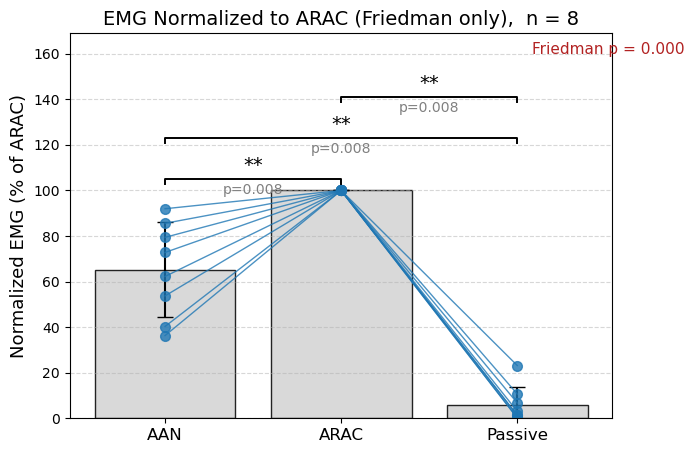

Friedman test  →  χ² = 16.000,  p = 0.0003
Passive vs AAN  →  p = 0.0078   (**)
Passive vs ARAC  →  p = 0.0078   (**)
AAN vs ARAC  →  p = 0.0078   (**)


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import friedmanchisquare, wilcoxon

# ─────────────────────────────────────────────────────────────
# 1. 원시 데이터
# p1 = [0.0046405, 0.0175836, 0.0254939]
# p2 = [0.0006574, 0.0179923, 0.0302460]
# p3 = [0.00022623, 0.00248322, 0.00341677]
# p4 = [0.00086965, 0.00333674, 0.01424477]
# p5 = [0.00549489, 0.02525252, 0.04734170]

p1 = [0.01566232191896718, 0.043164304562662285, 9.617439800402768e-05]
p2 = [0.016462179021517673, 0.0226162091808534, 0.00027636916716296576]
p3 = [0.022468912927915502, 0.0557723750124688, 4.854089555987785e-05]
p4 = [0.04106333758357777, 0.04464540231822996, 0.01033633330224644]
p5 = [0.005031651869630344, 0.006335565083385888, 8.632001826431004e-05]
p6 = [0.001990081656240324, 0.002325492302681139, 0.00024732700164244105]
p7 = [0.00393775684971357, 0.006326075263996409, 0.00019177317831647601]
p8 = [0.025891210219886687, 0.048203837196008494, 0.003232644686684996]


data         = np.vstack([p1, p2, p3, p4, p5, p6, p7, p8])      # (5, 3)
group_labels = ['AAN', 'ARAC','Passive']
x            = np.arange(len(group_labels))
n            = data.shape[0]

# ─────────────────────────────────────────────────────────────
# 2. ARAC 기준 정규화 (%MVC)
data_norm = (data.T / data[:, -2]).T * 100           # 각 행 마지막 값(ARAC)으로 나눔

# ─────────────────────────────────────────────────────────────
# 3. 비모수 검정
# 3-1) 전체 차이: Friedman
fried_stat, fried_p = friedmanchisquare(*data_norm.T)

# 3-2) 사후분석: 쌍별 Wilcoxon
pairs      = [('Passive', 'AAN'), ('Passive', 'ARAC'), ('AAN', 'ARAC')]
pair_idx   = [(0,1), (0,2), (1,2)]
pvals      = []
for a, b in pairs:
    pvals.append(wilcoxon(data_norm[:, group_labels.index(a)],
                          data_norm[:, group_labels.index(b)]).pvalue)

def p_to_star(p):
    return '***' if p < .001 else '**' if p < .01 else '*' if p < .05 else 'ns'
stars = [p_to_star(p) for p in pvals]

# ─────────────────────────────────────────────────────────────
# 4. 그래프
m, s = data_norm.mean(axis=0), data_norm.std(axis=0, ddof=1)

plt.figure(figsize=(7,5))
# 평균±SD 막대
plt.bar(x, m, yerr=s, capsize=6, color='lightgray',
        edgecolor='k', alpha=0.85, label='Mean ± SD')

# 개별 궤적
for row in data_norm:
    plt.plot(x, row, marker='o', linestyle='-', lw=1, ms=7,
             color='C0', alpha=.8)

# 축·제목
plt.xticks(x, group_labels, fontsize=12)
plt.ylabel('Normalized EMG (% of ARAC)', fontsize=13)
plt.title(f'EMG Normalized to ARAC (Friedman only),  n = {n}', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=.5)

# y-축 범위와 사후분석 표기 위치
base = (m + s).max() + 5
gap  = 18
y_max = base + gap*len(pairs) + 10
plt.ylim(0, y_max)

# 사후분석 선 + 별표 + p값
for i, ((a, b), star, p) in enumerate(zip(pair_idx, stars, pvals)):
    y = base + gap * i
    plt.plot([a, a, b, b], [y-2, y, y, y-2], c='k', lw=1.4)
    if star == 'ns':  # 한 줄 표기
        plt.text((a+b)/2, y+2, f'ns  (p={p:.3f})',
                 ha='center', va='bottom', fontsize=11)
    else:             # 별표 + p값 두 줄
        plt.text((a+b)/2, y+2, star,
                 ha='center', va='bottom', fontsize=14)
        plt.text((a+b)/2, y-8, f'p={p:.3f}',
                 ha='center', va='bottom', fontsize=10, color='gray')

# Friedman 결과 (우상단)
plt.text(2.95, y_max-4,
         f'Friedman p = {fried_p:.3f}',
         ha='right', va='top', color='firebrick', fontsize=11)

# plt.tight_layout()
plt.show()

# ─────────────────────────────────────────────────────────────
# 5. 콘솔에 통계 결과 요약 (선택)
print(f'Friedman test  →  χ² = {fried_stat:.3f},  p = {fried_p:.4f}')
for (a, b), p, s in zip(pairs, pvals, stars):
    print(f'{a} vs {b}  →  p = {p:.4f}   ({s})')


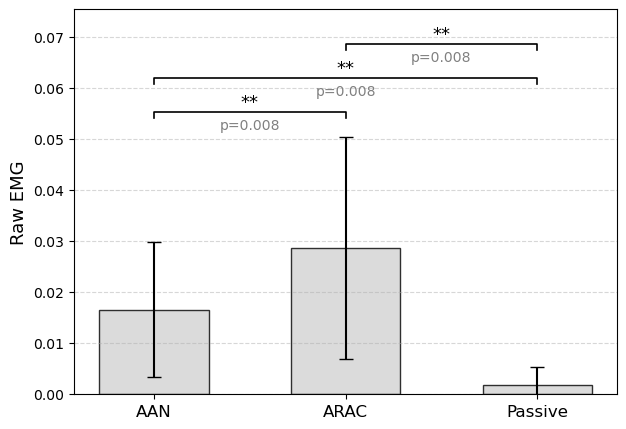

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import friedmanchisquare, wilcoxon

# 1. Raw EMG 데이터 (8명 × 3조건)
p1 = [0.01566232191896718, 0.043164304562662285, 9.617439800402768e-05]
p2 = [0.016462179021517673, 0.0226162091808534, 0.00027636916716296576]
p3 = [0.022468912927915502, 0.0557723750124688, 4.854089555987785e-05]
p4 = [0.04106333758357777, 0.04464540231822996, 0.01033633330224644]
p5 = [0.005031651869630344, 0.006335565083385888, 8.632001826431004e-05]
p6 = [0.001990081656240324, 0.002325492302681139, 0.00024732700164244105]
p7 = [0.00393775684971357, 0.006326075263996409, 0.00019177317831647601]
p8 = [0.025891210219886687, 0.048203837196008494, 0.003232644686684996]

data = np.vstack([p1, p2, p3, p4, p5, p6, p7, p8])
group_labels = ['AAN', 'ARAC', 'Passive']

#  → 간격을 0.7배로 조정
x = np.arange(len(group_labels)) * 0.7  
n = data.shape[0]

# 2. 통계 분석
fried_stat, fried_p = friedmanchisquare(*data.T)
pairs = [('Passive', 'AAN'), ('Passive', 'ARAC'), ('AAN', 'ARAC')]
pair_idx = [(0, 1), (0, 2), (1, 2)]
pvals = [
    wilcoxon(data[:, group_labels.index(a)],
             data[:, group_labels.index(b)]).pvalue
    for a, b in pairs
]
def p_to_star(p):
    return '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else 'ns'
stars = [p_to_star(p) for p in pvals]

# 3. 평균 & 표준편차
m = data.mean(axis=0)
s = data.std(axis=0, ddof=1)

# 4. 시각화
fig, ax = plt.subplots(figsize=(7, 5))
bar_width = 0.4

# 막대
ax.bar(x, m, yerr=s, capsize=5,
       width=bar_width,
       color='lightgray', edgecolor='k', alpha=0.8)

# 라벨, 제목, 격자
ax.set_xticks(x)
ax.set_xticklabels(group_labels, fontsize=12)
ax.set_ylabel('Raw EMG', fontsize=13)
# ax.set_title(f'Raw EMG Comparison (Friedman), n = {n}', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.5)

# 사후 분석 결과 표기 위치 계산
base = (m + s).max() + 0.005
gap = base * 0.12
y_max = base + gap * len(pairs) + 0.0001
ax.set_ylim(0, y_max)

# 사후 분석 라인 & 별표
for i, ((a, b), star, p) in enumerate(zip(pair_idx, stars, pvals)):
    xa, xb = x[a], x[b]  # x 좌표도 같이 줄여짐
    y = base + gap * i
    ax.plot([xa, xa, xb, xb],
            [y - gap*0.2, y, y, y - gap*0.2],
            c='k', lw=1.2)
    ax.text((xa + xb) / 2, y + 0.00, star,
            ha='center', va='bottom', fontsize=13)
    ax.text((xa + xb) / 2, y - gap*0.6, f'p={p:.3f}',
            ha='center', va='bottom', fontsize=10, color='gray')

# plt.tight_layout(pad=2)
plt.show()


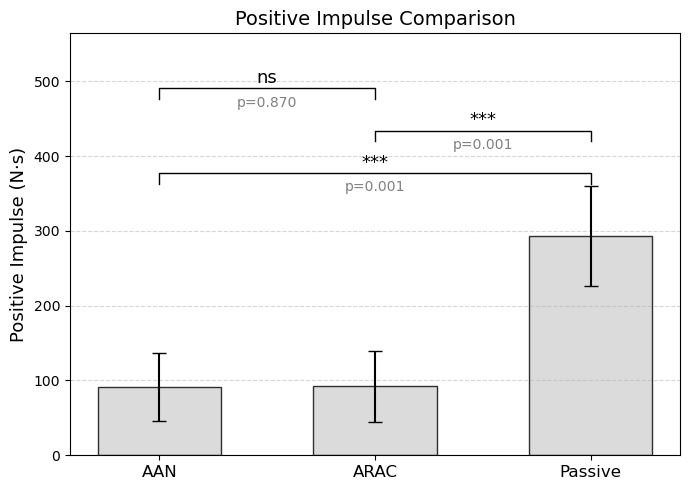

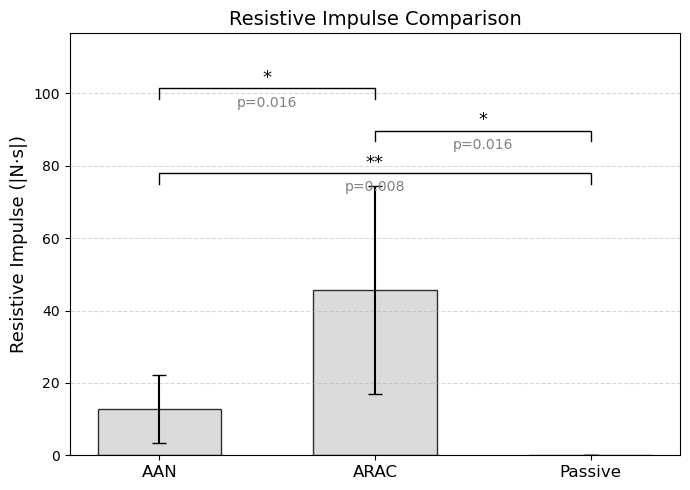

In [48]:
# ──────────────────────────────────────────────────────────────
#  준비: 패키지
# ──────────────────────────────────────────────────────────────
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel, wilcoxon, friedmanchisquare

# ──────────────────────────────────────────────────────────────
#  1) 데이터 (8명 × 3조건)  ── 수정 필요 없음
# ──────────────────────────────────────────────────────────────
subjects = ['LJW','JSH','KDH','KMJ','AJW','PGE','HNG','AIG']
group_labels = ['AAN', 'ARAC', 'Passive']

# Positive Impulse (N·s)
positive = np.array([
    [ 65.01,  61.44, 349.15],
    [104.32, 133.72, 338.84],
    [ 13.74,  12.36, 400.14],
    [ 79.47,  89.25, 215.50],
    [ 87.82,  68.43, 289.21],
    [ 75.99,  89.93, 233.37],
    [160.99, 168.78, 291.70],
    [140.57, 112.81, 223.76]
])

# Resistive Impulse after 2 s (|N·s|)
resistive = np.array([
    [16.28, 69.89, 0.00],
    [25.18, 59.23, 0.00],
    [24.39, 90.59, 0.00],
    [14.14, 38.44, 0.04],
    [ 2.45, 16.92, 0.00],
    [14.28, 46.76, 0.00],
    [ 0.01,  0.00, 0.00],
    [ 5.35, 43.05, 0.00]
])

# ──────────────────────────────────────────────────────────────
#  2) 유틸: 사후검정 & 별표
# ──────────────────────────────────────────────────────────────
pairs = [('Passive','AAN'), ('Passive','ARAC'), ('AAN','ARAC')]
pair_idx = [(2,0), (2,1), (0,1)]  # group_labels 의 인덱스

def p_to_star(p):
    return '***' if p<0.001 else '**' if p<0.01 else '*' if p<0.05 else 'ns'

# ──────────────────────────────────────────────────────────────
#  3) 시각화 함수
# ──────────────────────────────────────────────────────────────
def bar_with_stats(data, ylabel, title, test_type='param'):
    """
    data      : (n_subjects, 3) ndarray
    test_type : 'param' → paired t-test   /  'nonparam' → Wilcoxon
    """
    x     = np.arange(len(group_labels))*0.7     # bar 간격 축소
    means = data.mean(axis=0)
    stds  = data.std(axis=0, ddof=1)
    n     = data.shape[0]
    
    # ── 주통계 검정 (제목에 표시용)
    if test_type=='param':
        # 간단히 반복측정 ANOVA 대신 Friedmannchisquare? 아니면 생략
        from pingouin import rm_anova
    else:
        fried_stat, fried_p = friedmanchisquare(*data.T)
    
    # ── bar plot
    fig, ax = plt.subplots(figsize=(7,5))
    ax.bar(x, means, yerr=stds, width=0.4,
           color='lightgray', edgecolor='k', alpha=0.8, capsize=5)
    
    ax.set_xticks(x)
    ax.set_xticklabels(group_labels, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=13)
    ax.grid(axis='y', ls='--', alpha=0.5)
    ax.set_title(title, fontsize=14)
    
    # ── 사후검정
    pvals, stars = [], []
    for i,(a,b) in enumerate(pairs):
        col_a, col_b = group_labels.index(a), group_labels.index(b)
        if test_type=='param':
            p = ttest_rel(data[:,col_a], data[:,col_b]).pvalue
        else:
            p = wilcoxon(data[:,col_a], data[:,col_b]).pvalue
        pvals.append(p); stars.append(p_to_star(p))
    
    # ── 별·p 텍스트 위치
    base = (means+stds).max()*1.05
    gap  = base*0.15
    for i, ((c1,c2), star, p) in enumerate(zip(pair_idx, stars, pvals)):
        y = base + gap*i
        xa, xb = x[c1], x[c2]
        ax.plot([xa,xa,xb,xb], [y-gap*0.25, y, y, y-gap*0.25], c='k', lw=1)
        ax.text((xa+xb)/2, y+gap*0.03, star, ha='center', va='bottom', fontsize=13)
        ax.text((xa+xb)/2, y-gap*0.5, f'p={p:.3f}',
                ha='center', va='bottom', fontsize=10, color='gray')
    
    ax.set_ylim(0, base + gap*len(pairs) + gap*0.3)
    plt.tight_layout()
    plt.show()

# ──────────────────────────────────────────────────────────────
#  4) 그림 출력
# ──────────────────────────────────────────────────────────────
bar_with_stats(positive,
               ylabel='Positive Impulse (N·s)',
               title='Positive Impulse Comparison',
               test_type='param')

bar_with_stats(resistive,
               ylabel='Resistive Impulse (|N·s|)',
               title='Resistive Impulse Comparison',
               test_type='nonparam')


>>> Positive Impulse Comparison: Omnibus RM-ANOVA F(2,14)=33.42, p=0.0000


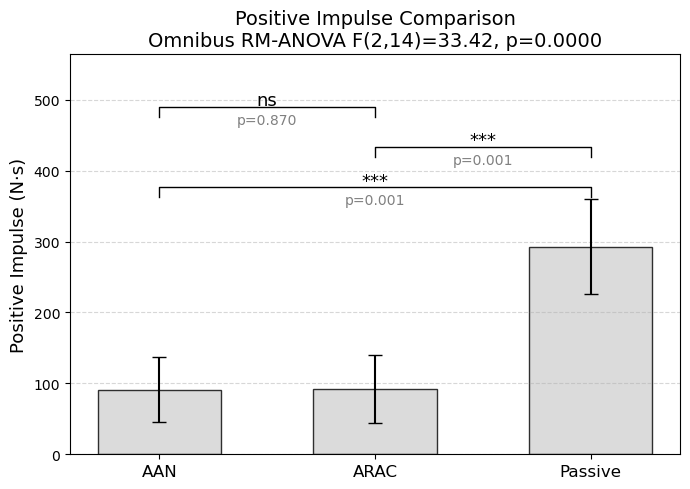

>>> Resistive Impulse Comparison: Friedman χ²(2)=12.84, p=0.0016


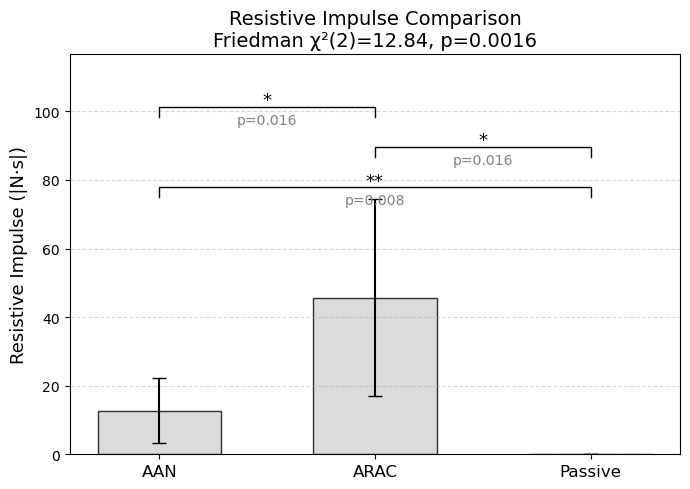

In [49]:
# ──────────────────────────────────────────────────────────────
#  준비: 패키지
# ──────────────────────────────────────────────────────────────
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel, wilcoxon, friedmanchisquare

# (pingouin이 있으면 반복측정 ANOVA 편리)
try:
    import pingouin as pg
    HAVE_PINGOUIN = True
except ImportError:
    HAVE_PINGOUIN = False
    from statsmodels.stats.anova import AnovaRM   # 대체용

# ──────────────────────────────────────────────────────────────
#  1) 데이터 (8명 × 3조건)
# ──────────────────────────────────────────────────────────────
subjects = ['LJW','JSH','KDH','KMJ','AJW','PGE','HNG','AIG']
group_labels = ['AAN', 'ARAC', 'Passive']

positive = np.array([
    [ 65.01,  61.44, 349.15],
    [104.32, 133.72, 338.84],
    [ 13.74,  12.36, 400.14],
    [ 79.47,  89.25, 215.50],
    [ 87.82,  68.43, 289.21],
    [ 75.99,  89.93, 233.37],
    [160.99, 168.78, 291.70],
    [140.57, 112.81, 223.76]
])

resistive = np.array([
    [16.28, 69.89, 0.00],
    [25.18, 59.23, 0.00],
    [24.39, 90.59, 0.00],
    [14.14, 38.44, 0.04],
    [ 2.45, 16.92, 0.00],
    [14.28, 46.76, 0.00],
    [ 0.01,  0.00, 0.00],
    [ 5.35, 43.05, 0.00]
])

# ──────────────────────────────────────────────────────────────
#  2) 공통 유틸
# ──────────────────────────────────────────────────────────────
pairs     = [('Passive','AAN'), ('Passive','ARAC'), ('AAN','ARAC')]
pair_idx  = [(2,0), (2,1), (0,1)]

def p_to_star(p):
    return '***' if p<0.001 else '**' if p<0.01 else '*' if p<0.05 else 'ns'

def omnibus_rm_anova(data, dv_label='value'):
    """Repeated-measures ANOVA → (F, p, df1, df2)"""
    df_long = pd.DataFrame({
        'Subject'   : np.repeat(subjects, 3),
        'Controller': group_labels * len(subjects),
        dv_label    : data.flatten()
    })
    if HAVE_PINGOUIN:
        res = pg.rm_anova(dv=dv_label, within='Controller',
                          subject='Subject', data=df_long)
        return res['F'].iloc[0], res['p-unc'].iloc[0], res['ddof1'].iloc[0], res['ddof2'].iloc[0]
    else:
        anov = AnovaRM(df_long, depvar=dv_label,
                       subject='Subject', within=['Controller']).fit()
        tab  = anov.anova_table
        return tab['F Value'][0], tab['Pr > F'][0], tab['Num DF'][0], tab['Den DF'][0]

# ──────────────────────────────────────────────────────────────
#  3) 시각화 + 통계
# ──────────────────────────────────────────────────────────────
def bar_with_stats(data, ylabel, title, test_type='param'):
    x     = np.arange(3)*0.7
    means = data.mean(axis=0)
    stds  = data.std(axis=0, ddof=1)

    # ── (1) Omnibus
    if test_type == 'param':
        F, p_omni, df1, df2 = omnibus_rm_anova(data)
        omni_str = f'Omnibus RM-ANOVA F({int(df1)},{int(df2)})={F:.2f}, p={p_omni:.4f}'
    else:
        chi2_stat, p_omni = friedmanchisquare(*data.T)
        omni_str = f'Friedman χ²(2)={chi2_stat:.2f}, p={p_omni:.4f}'

    print(f'>>> {title}: {omni_str}')

    # ── (2) Pairwise (post-hoc)
    pvals, stars = [], []
    for (a,b) in pairs:
        col_a, col_b = group_labels.index(a), group_labels.index(b)
        if test_type=='param':
            p = ttest_rel(data[:,col_a], data[:,col_b]).pvalue
        else:
            p = wilcoxon(data[:,col_a], data[:,col_b]).pvalue
        pvals.append(p); stars.append(p_to_star(p))

    # ── (3) Plot
    fig, ax = plt.subplots(figsize=(7,5))
    ax.bar(x, means, yerr=stds, width=0.4,
           color='lightgray', edgecolor='k', capsize=5, alpha=0.8)
    ax.set_xticks(x); ax.set_xticklabels(group_labels, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=13)
    ax.set_title(f'{title}\n{omni_str}', fontsize=14)
    ax.grid(axis='y', ls='--', alpha=0.5)

    # post-hoc 별표
    base = (means+stds).max()*1.05
    gap  = base*0.15
    for i, ((c1,c2), star, p) in enumerate(zip(pair_idx, stars, pvals)):
        y = base + gap*i
        xa, xb = x[c1], x[c2]
        ax.plot([xa,xa,xb,xb],[y-gap*0.25,y,y,y-gap*0.25],c='k',lw=1)
        ax.text((xa+xb)/2, y+gap*0.03, star, ha='center',fontsize=13)
        ax.text((xa+xb)/2, y-gap*0.5, f'p={p:.3f}',
                ha='center', va='bottom', fontsize=10, color='gray')
    ax.set_ylim(0, base + gap*len(pairs) + gap*0.3)
    plt.tight_layout(); plt.show()

# ──────────────────────────────────────────────────────────────
#  4) 실행
# ──────────────────────────────────────────────────────────────
bar_with_stats(positive,
               ylabel='Positive Impulse (N·s)',
               title='Positive Impulse Comparison',
               test_type='param')

bar_with_stats(resistive,
               ylabel='Resistive Impulse (|N·s|)',
               title='Resistive Impulse Comparison',
               test_type='nonparam')


>>> Positive Impulse Comparison: Friedman χ²(2)=12.00, p=0.0025, W=0.750


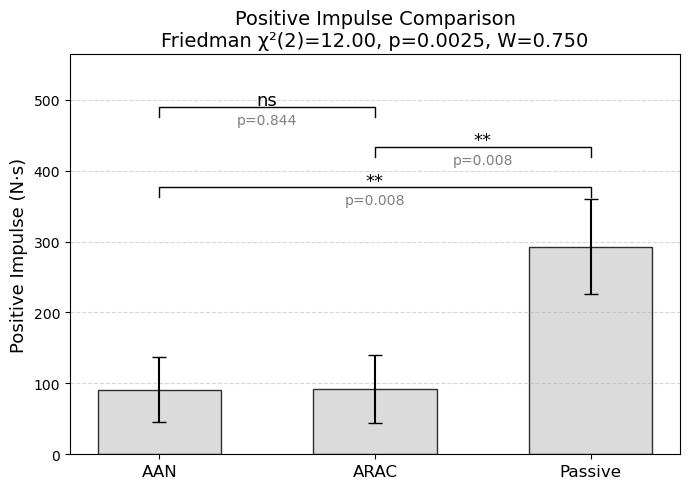

>>> Resistive Impulse Comparison: Friedman χ²(2)=12.84, p=0.0016, W=0.802


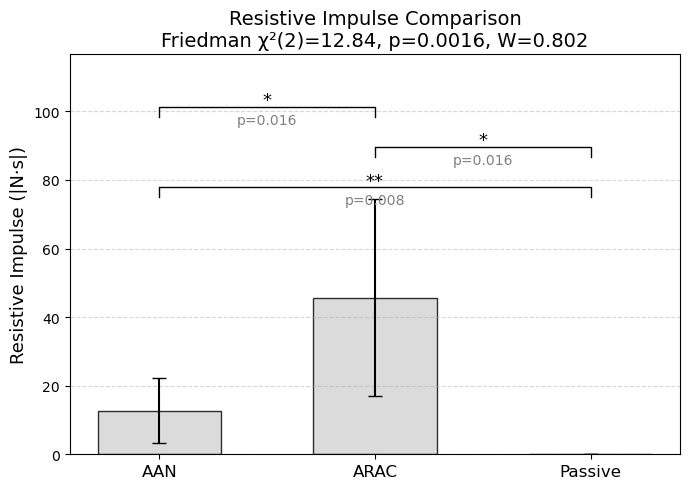

In [52]:
"""
Repeated‑measures comparison for 3 controller conditions (AAN, ARAC, Passive)
using **Friedman test** + Wilcoxon signed‑rank post‑hoc.

원본 스크립트에서 RM‑ANOVA → Friedman 으로 통일.
효과량으로 Kendall’s W(치 제곱 / n(k‑1)) 출력.
"""

# ──────────────────────────────────────────────────────────────
#  준비: 패키지
# ──────────────────────────────────────────────────────────────
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon, friedmanchisquare

# (pingouin 있으면 Kendall's W 계산이 편해 추가 사용)
try:
    import pingouin as pg
    HAVE_PINGOUIN = True
except ImportError:
    HAVE_PINGOUIN = False

# ──────────────────────────────────────────────────────────────
#  1) 데이터 (8명 × 3조건)
# ──────────────────────────────────────────────────────────────
subjects = ['LJW', 'JSH', 'KDH', 'KMJ', 'AJW', 'PGE', 'HNG', 'AIG']
group_labels = ['AAN', 'ARAC', 'Passive']

positive = np.array([
    [65.01, 61.44, 349.15],
    [104.32, 133.72, 338.84],
    [13.74, 12.36, 400.14],
    [79.47, 89.25, 215.50],
    [87.82, 68.43, 289.21],
    [75.99, 89.93, 233.37],
    [160.99, 168.78, 291.70],
    [140.57, 112.81, 223.76]
])

resistive = np.array([
    [16.28, 69.89, 0.00],
    [25.18, 59.23, 0.00],
    [24.39, 90.59, 0.00],
    [14.14, 38.44, 0.04],
    [2.45, 16.92, 0.00],
    [14.28, 46.76, 0.00],
    [0.01, 0.00, 0.00],
    [5.35, 43.05, 0.00]
])

# ──────────────────────────────────────────────────────────────
#  2) 공통 유틸
# ──────────────────────────────────────────────────────────────
pairs    = [('Passive', 'AAN'), ('Passive', 'ARAC'), ('AAN', 'ARAC')]
pair_idx = [(2, 0), (2, 1), (0, 1)]


def p_to_star(p: float) -> str:
    """p‑value를 별표 표시로 변환"""
    return '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else 'ns'


def kendalls_w(chi2: float, n: int, k: int) -> float:
    """Friedman χ² 기반 Kendall's W 계산"""
    return chi2 / (n * (k - 1))


def omnibus_friedman(data: np.ndarray):
    """Friedman 검정 + Kendall's W 반환"""
    chi2_stat, p_val = friedmanchisquare(*data.T)
    W = kendalls_w(chi2_stat, data.shape[0], data.shape[1])
    return chi2_stat, p_val, W

# ──────────────────────────────────────────────────────────────
#  3) 시각화 + 통계 (Friedman 고정)
# ──────────────────────────────────────────────────────────────

def bar_with_stats(data: np.ndarray, ylabel: str, title: str):
    """Friedman + Wilcoxon post‑hoc bar plot"""
    x = np.arange(3) * 0.7
    means = data.mean(axis=0)
    stds = data.std(axis=0, ddof=1)

    # ── (1) Omnibus Friedman
    chi2, p_omni, W = omnibus_friedman(data)
    omni_str = f'Friedman χ²(2)={chi2:.2f}, p={p_omni:.4f}, W={W:.3f}'
    print(f'>>> {title}: {omni_str}')

    # ── (2) Pairwise Wilcoxon
    pvals, stars = [], []
    for (label_a, label_b) in pairs:
        a_idx, b_idx = group_labels.index(label_a), group_labels.index(label_b)
        p = wilcoxon(data[:, a_idx], data[:, b_idx]).pvalue
        pvals.append(p)
        stars.append(p_to_star(p))

    # ── (3) Plot
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.bar(x, means, yerr=stds, width=0.4,
           color='lightgray', edgecolor='k', capsize=5, alpha=0.8)
    ax.set_xticks(x)
    ax.set_xticklabels(group_labels, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=13)
    ax.set_title(f'{title}\n{omni_str}', fontsize=14)
    ax.grid(axis='y', ls='--', alpha=0.5)

    # post‑hoc 별표
    base = (means + stds).max() * 1.05
    gap = base * 0.15
    for i, ((idx_a, idx_b), star, p) in enumerate(zip(pair_idx, stars, pvals)):
        y = base + gap * i
        xa, xb = x[idx_a], x[idx_b]
        ax.plot([xa, xa, xb, xb], [y - gap * 0.25, y, y, y - gap * 0.25], c='k', lw=1)
        ax.text((xa + xb) / 2, y + gap * 0.03, star, ha='center', fontsize=13)
        ax.text((xa + xb) / 2, y - gap * 0.5, f'p={p:.3f}',
                ha='center', va='bottom', fontsize=10, color='gray')

    ax.set_ylim(0, base + gap * len(pairs) + gap * 0.3)
    # plt.tight_layout()
    plt.tight_layout(); plt.show()

# ──────────────────────────────────────────────────────────────
#  4) 실행 예시
# ──────────────────────────────────────────────────────────────
if __name__ == "__main__":
    bar_with_stats(positive,
                   ylabel='Positive Impulse (N·s)',
                   title='Positive Impulse Comparison')

    bar_with_stats(resistive,
                   ylabel='Resistive Impulse (|N·s|)',
                   title='Resistive Impulse Comparison')


In [54]:
import numpy as np
import matplotlib.pyplot as plt

# 2) RBF 채널 & Trajectory, 시간축
w1   = tdms[group]['RBF1'][:] 
w2   = tdms[group]['RBF2'][:]
w3   = tdms[group]['RBF3'][:]
w4   = tdms[group]['RBF4'][:]
w5   = tdms[group]['RBF5'][:]  # 필요시 사용
traj = tdms[group]['Trajectory'][:]
time = np.arange(len(w1)) / 50   # sample_rate = 50 Hz

# 3) Trajectory rising edge 인덱스 (0→1)
rising_idx = np.where((traj[:-1] == 0) & (traj[1:] == 1))[0] + 1

# 4) 600초 이후의 rising edge만
mask600 = time[rising_idx] <= 900
rising_idx = rising_idx[mask600]

# 5) 해당 시점의 RBF 값들
w1_rise = w1[rising_idx]
w2_rise = w2[rising_idx]
w3_rise = w3[rising_idx]
w4_rise = w4[rising_idx]  # 필요시 사용
w5_rise = w5[rising_idx]  # 필요시 사용

# 6) x축을 '사이클 번호(=rising edge 개수)'로
cycle_nums = np.arange(len(rising_idx))  # 0, 1, 2, ...

plt.figure(figsize=(10,5))
plt.plot(cycle_nums, w1_rise, '-o', color='C0', label='RBF1')
plt.plot(cycle_nums, w2_rise, '-o', color='C1', label='RBF2')
plt.plot(cycle_nums, w3_rise, '-o', color='C2', label='RBF3')
plt.plot(cycle_nums, w4_rise, '-o', color='C3', label='RBF4')  # 필요시 사용
plt.plot(cycle_nums, w5_rise, '-o', color='C4', label='RBF5')  # 필요시 사용

plt.xlabel('Cycle Number')
plt.ylabel('RBF Weights')
plt.legend()
plt.grid(True)
# plt.tight_layout()
plt.show()

cycle_nums = cycle_nums[-21:-8]
w1_rise = w1_rise[-21:-8]
w2_rise = w2_rise[-21:-8]
w3_rise = w3_rise[-21:-8]
w4_rise = w4_rise[-21:-8]
w5_rise = w5_rise[-21:-8]

plt.figure(figsize=(10,5))
plt.plot(cycle_nums, w1_rise, '-o', color='C0', label='RBF1')
plt.plot(cycle_nums, w2_rise, '-o', color='C1', label='RBF2')
plt.plot(cycle_nums, w3_rise, '-o', color='C2', label='RBF3')
plt.plot(cycle_nums, w4_rise, '-o', color='C3', label='RBF4')
plt.plot(cycle_nums, w5_rise, '-o', color='C4', label='RBF5')

plt.xlabel('Cycle Number')
plt.ylabel('RBF Weights')
plt.legend()
plt.grid(True)
plt.show()

KeyError: "There is no group named 'group1' in the TDMS file"

In [ ]:
# ────────── 패키지 로드 ──────────
import numpy as np, pandas as pd
from itertools import combinations
from scipy.stats import ttest_rel
try:
    import pingouin as pg
    HAVE_PG = True
except ImportError:
    HAVE_PG = False

# ────────── 데이터 ──────────
group_labels = ['AAN', 'ARAC', 'Passive']
positive = np.array([
    [ 65.01,  61.44, 349.15],
    [104.32, 133.72, 338.84],
    [ 13.74,  12.36, 400.14],
    [ 79.47,  89.25, 215.50],
    [ 87.82,  68.43, 289.21],
    [ 75.99,  89.93, 233.37],
    [160.99, 168.78, 291.70],
    [140.57, 112.81, 223.76]
])
resistive = np.array([
    [16.28, 69.89, 0.00],
    [25.18, 59.23, 0.00],
    [24.39, 90.59, 0.00],
    [14.14, 38.44, 0.04],
    [ 2.45, 16.92, 0.00],
    [14.28, 46.76, 0.00],
    [ 0.01,  0.00, 0.00],
    [ 5.35, 43.05, 0.00]
])

# ────────── 유틸 함수 ──────────
def cohens_dz(a, b):
    diff = a - b
    return diff.mean() / diff.std(ddof=1)

def r_from_t(t, df):
    return t / np.sqrt(t**2 + df)

def bootstrap_ci(effect_fn, a, b, n_boot=5000, ci=95, seed=0):
    """paired 부트스트랩 CI"""
    rng = np.random.default_rng(seed)
    n   = len(a)
    boots = []
    for _ in range(n_boot):
        idx = rng.choice(n, n, replace=True)   # 피험자 인덱스 재표집
        boots.append(effect_fn(a[idx], b[idx]))
    low, high = np.percentile(boots, [(100-ci)/2, 100-(100-ci)/2])
    return low, high


# ────────── 효과크기 계산 ──────────
results = []
for var_name, data in [('Positive', positive), ('Resistive', resistive)]:
    for i, j in combinations(range(3), 2):
        name_a, name_b = group_labels[i], group_labels[j]
        a, b = data[:, i], data[:, j]

        # Cohen's dz
        dz = pg.compute_effsize(a, b, paired=True, eftype='cohen') if HAVE_PG else cohens_dz(a, b)

        # t, p, r
        if HAVE_PG:
            res = pg.ttest(a, b, paired=True).iloc[0]   # <-- 핵심 수정
            t, p = res['T'], res['p-val']
            r  = pg.compute_effsize(a, b, paired=True, eftype='r')
        else:
            t, p = ttest_rel(a, b)
            r  = r_from_t(t, len(a)-1)

        # 부트스트랩 CI
        ci_low, ci_high = bootstrap_ci(cohens_dz, a, b)

        results.append({
            'Variable': var_name,
            'Comparison': f'{name_a} vs {name_b}',
            "Cohen's dz": round(dz, 2),
            "dz 95% CI": f'[{ci_low:.2f}, {ci_high:.2f}]',
            'r': round(r, 2),
            'p-value': round(p, 4)
        })

effects_df = pd.DataFrame(results)
print(effects_df.to_string(index=False))


 Variable      Comparison  Cohen's dz      dz 95% CI     r  p-value
 Positive     AAN vs ARAC       -0.02  [-1.09, 0.71]  0.92   0.8703
 Positive  AAN vs Passive       -3.53 [-4.16, -1.59] -0.51   0.0007
 Positive ARAC vs Passive       -3.46 [-4.04, -1.69] -0.42   0.0006
Resistive     AAN vs ARAC       -1.54 [-3.58, -0.98]  0.87   0.0030
Resistive  AAN vs Passive        1.90   [0.83, 2.92]  0.06   0.0067
Resistive ARAC vs Passive        2.25   [0.96, 3.83] -0.10   0.0028


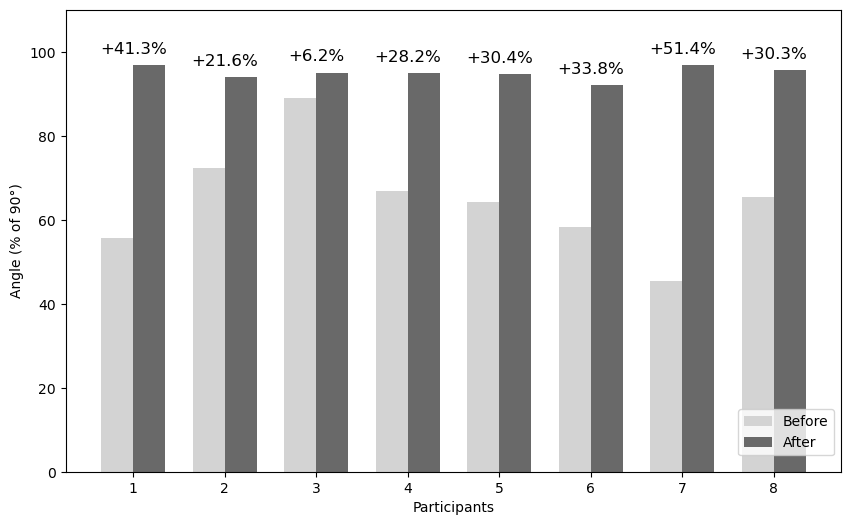

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 각도(°) 데이터 ― ‘변경 전’과 ‘변경 후’
before_deg = [50, 65.16, 79.98, 60.05, 57.80, 52.42, 40.92, 58.87]
after_deg  = [87.17, 84.64, 85.53, 85.46, 85.13, 82.85, 87.18, 86.16]

# 90° 기준 → 퍼센트로 변환
before_pct = [x / 90 * 100 for x in before_deg]
after_pct  = [x / 90 * 100 for x in after_deg]

# 시각화
indices = np.arange(len(before_deg))
width = 0.35

plt.figure(figsize=(10, 6))
# 회색 계열 색상 지정
plt.bar(indices - width / 2, before_pct, width, label='Before', color='lightgray')
plt.bar(indices + width / 2, after_pct, width, label='After', color='dimgray')

plt.ylabel('Angle (% of 90°)')
plt.xlabel('Participants')
plt.xticks(indices, [f'{i + 1}' for i in indices])
plt.ylim(0, 110)
# plt.legend()
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 0.15))




# 각 샘플별 개선 퍼센트 주석
for i, (b, a) in enumerate(zip(before_pct, after_pct)):
    diff = a - b
    plt.text(i, max(b, a) + 2, f'+{diff:.1f}%', ha='center', va='bottom', fontsize=12)

plt.show()
